In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
def criarPopulacao(tamanho):
    listaRandomX=[]
    listaRandomY=[]
    for i in range(0,tamanho):
        listaRandomX.append(random.uniform(0,10));
        listaRandomY.append(random.uniform(0,10));
    arrayX = np.array(listaRandomX)
    arrayY = np.array(listaRandomY)
    return arrayX,arrayY

In [3]:
def f6(x,y):
    return math.sqrt(x)*math.sin(x)*math.sqrt(y)*math.sin(y)
    #return  0.5 - ( ( math.sin(math.sqrt(x**2+y**2)))**2 - 0.5 ) / ((1+0.001*(x**2+y**2))**2)

In [4]:
def alturaPopulacao(tamanho,vetorX,vetorY):
    listaZ=[]
    for i in range(0,tamanho):
        listaZ.append( f6(vetorX[i],vetorY[i]) )
    return np.array(listaZ)

In [5]:
def clonagem(tamanho,Beta,vetorX,vetorY):
    numeroClones= math.floor(Beta*tamanho)
    listaDeListasClonesX=[]
    listaDeListasClonesY=[]
    for i in range(0,tamanho):
        listaClonesX=[]
        listaClonesY=[]
        for j in range(0,numeroClones):
            listaClonesX.append(vetorX[i])
            listaClonesY.append(vetorY[i])
        listaDeListasClonesX.append(listaClonesX)
        listaDeListasClonesY.append(listaClonesY)
    return numeroClones,listaDeListasClonesX,listaDeListasClonesY


        

In [6]:
def trunc_gauss(mu, sigma, bottom, top):
    a = random.gauss(mu,sigma)
    while (bottom <= a <= top) == False:
        a = random.gauss(mu,sigma)
    return a

In [16]:
def mutacaoComSelecao(tamanho,numeroClones,p,vetorClonesX,vetorClonesY,vetorZ):
    zmax = np.amax(vetorZ)
    vetorSelecionadosX=[]
    vetorSelecionadosY=[]
    zTemporario=0
    iTemporario=0
    jTemporario=0
    for i in range(0,tamanho):
        zTemporario=0
        iTemporario=0
        jTemporario=0
        if ( math.exp(-p*(vetorZ[i]/zmax) ) >= trunc_gauss(0.5,0.5,0,1) ):
            for j in range(0,numeroClones):
                vetorClonesX[i][j] = (trunc_gauss(vetorClonesX[i][j],1,0,10))
                vetorClonesY[i][j] = (trunc_gauss(vetorClonesY[i][j],1,0,10))
        #após mutados seleciona o melhor de cada grupo de clones
        for j in range(0,numeroClones):
            if(f6(vetorClonesX[i][j], vetorClonesY[i][j]) > zTemporario):
                    #print(zTemporario)
                    zTemporario = f6(vetorClonesX[i][j], vetorClonesY[i][j])
                    jTemporario = j
        vetorSelecionadosX.append(vetorClonesX[i][jTemporario])
        vetorSelecionadosY.append(vetorClonesY[i][jTemporario])
    return np.array(vetorSelecionadosX),np.array(vetorSelecionadosY)
    

In [17]:
f6(1,1)

0.7080734182735712

In [18]:
def filterVector(vector,vector2,mini,maxi):
    newVector=[]
    newVector2=[]
    for i in range(0,len(vector)):
        if (vector[i] <=maxi and vector[i]>=mini) and (vector2[i] <=maxi and vector2[i]>=mini) :
            newVector.append(vector[i])
            newVector2.append(vector2[i])
    return np.array(newVector),np.array(newVector2)

10000
100 100


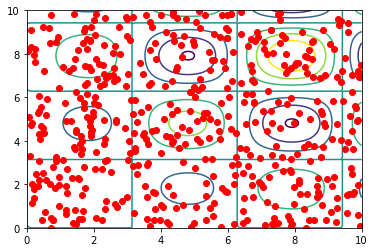

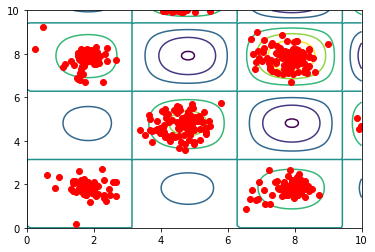

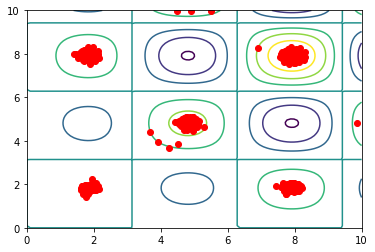

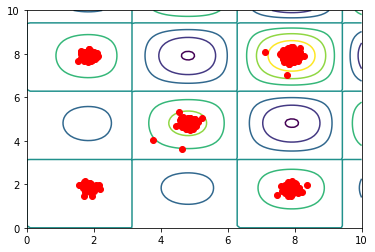

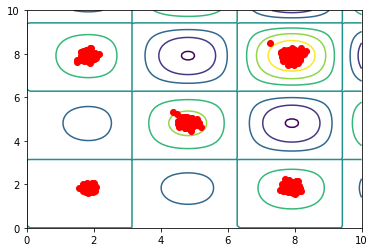

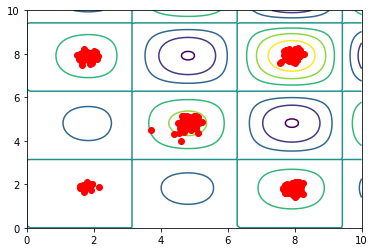

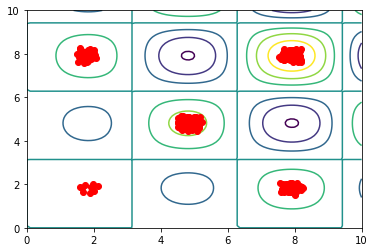

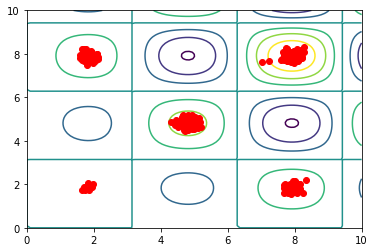

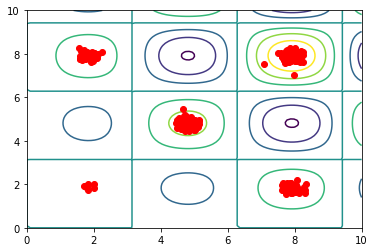

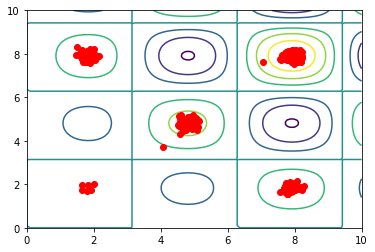

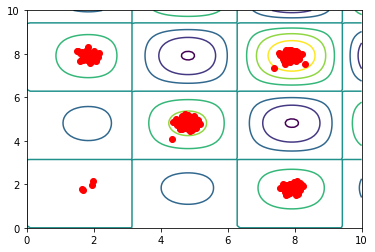

In [26]:
tamanho=500
Beta=0.1
p=0.5
iterar=50
X,Y = criarPopulacao(tamanho)
size=10


x = np.linspace(0,size,100)
y = np.linspace(0,size,100)

y2=np.array([y[0]]*100)
for i in range(1,100):
    a=np.array([y[i]]*100)
    y2 = np.concatenate((y2,a))
    
x2=x
for i in range(0,100):
    x2 = np.concatenate((x2,x))
    
z = alturaPopulacao(len(y2),x2,y2)
print(len(z))
print(len(x),len(y))
z = z.reshape(len(x), len(y))       

plt.contour(x, y, z)
plt.plot(X,Y, 'ro')
plt.show()

for i  in range(0,iterar):
    Z= alturaPopulacao(tamanho,X,Y)
    NC,XC,YC = clonagem(tamanho,Beta,X,Y)
    X,Y = mutacaoComSelecao(tamanho,NC,p,XC,YC,Z)
    if(i%5==0):
        plt.contour(x, y, z)
        X2,Y2 =filterVector(X,Y,0,size)
        plt.plot(X2,Y2, 'ro')
        plt.show()

In [23]:
math.sqrt(4)

2.0

In [12]:
f6(7.917,7.917)

7.885600701977823

In [13]:
2.808**2


7.884863999999999

In [14]:
X.mean()

5.306949485343311

In [15]:
Y.mean()

5.149585383695614